<a href="https://colab.research.google.com/github/56aaaaa/Physics-informed-neural-networks/blob/master/original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physics-informed neural networks: A deep learning framework for solving forward and inverse problems involving nonlinear partial differential equations

## Author:M. Raissi, P. Perdikaris, G.E. Karniadakis

[github](https://github.com/maziarraissi/PINNs)

This piece of code is to predict the velocity fields and the pressure of a fluid system's flow status, based on Naiver-Stoke 2D equation,the results are demonstrated in **tensorflow 2 using the original data**. As the original code was written in tensorflow 1, variations were made to compat the latest version

In this work, we consider parametrized and nonlinear partial differential equations of the general form as

$u_t + N[u; \lambda] = 0, x \in {\Omega}􏰀, t \in [0, T]$

where $u_t$ denotes the latent solution, $N[u; λ]$ is a nonlinear operator parameterized by λ, a weight variable and $\Omega$ is a subset of $\mathbb{R}^D$

The current code is for the continuous time model, hence from the above we can define
$f :=u_t +N[u]$
by proceeding $u(t,x)$ to the neural network, we can get $f(t,x)$ as the result.

This network can be derived by applying the chain rule for differentiating compositions of functions using automatic differentiation, and has the same parameters as the network representing $u(t,x)$, albeit with different activation functions due to the action of the differential operator $N$. But both $u(t,x)$ and $f(t,x)$ can be operated by minimizing the mean squared error loss where:
$$MSE=MSE_u+MSE_f$$
$$MSE_U = \frac{1}{N_u}\sum_{i=1}^{N_u}\lvert u(t_u^i,x_u^i)-u^i \rvert^2$$
$$MSE_f = \frac{1}{N_f}\sum_{i=1}^{N_f}\lvert f(t_f^i,x_f^i) \rvert^2$$

As the $MSE_U$ represent the loss for the first neural net,a multi-layered neural network, with hyperbolic tangent as the activation function, $MSE_f$ is for the second neural net,a single layer neural network, with Naiver-Stokes function(see below) as the activation function. The $MSE_f$ is included to the total loss, this applys the Naiver-Stokes function by balancing the $MSE_u$ to improve the final loss $MSE=MSE_u+MSE_f$ computed


Where the ${t_u^i,x_u^i,u^i}$ denote the initial and boundary training data on $u(t,x)$ and $[t_f^i,x_f^i]_{i=1}^{N_f}$ specify the collocations points ${MSE}_u$ corresponds to the initial and boundary data while ${MSE}_f$ enforces the structure imposed by equation at a finite set of collocation points.

In 2-D Naiver-Stoke equation, we can define that
$$u_t+λ_1(u*u_x +v*u_y)=-p_x+λ_2(u_{xx} +u_{yy})$$
$$v_t+λ_1(u*v_x +v*v_y)=-p_y+λ_2(v_{xx} +v_{yy})$$

hence we can derive $f(x,y,t)$ and $g(x,y,t)$, where g is simillar as f but it is the result for vertical flow v, 

$$f :=u_t +λ_1(u*u_x +v*u_y)+p_x −λ_2(u_{xx} +u_{yy})$$

$$g:=v_t +λ_1(u*v_x +v*v_y)+p_y −λ_2(v_{xx} +v_{yy})$$

On the equations $λ_1$ and $λ_2$ are the weighting parameter, unknown for now, solutions to the Navier–Stokes equations are searched in the set of divergence-free functions; i.e.,
$$u_x +v_y =0$$

This extra equation is the continuity equation for incompressible fluids that describes the conservation of mass of the fluid.
We make the assumption that$u=ψ_y, v=−ψ_x$ for latent function $ψ(t,x,y)$. 

Under this assumption, the continuity equation $u_x +v_y =0$ will be automatically satisfied.

Given the measurements {$t^i,x^i,y^i,u^i,v^i,p^i$} of the velocity field, what we need is the parameters λ as well as the pressure $p$, by taking the result the Naiver-Stoke parameter,[$f(x,y,t),g(x,y,t),ψ(x,y,t),p(x,y,t)$] and λ can be trained by minimizing the MSE loss

$$MSE = \frac{1}{N}\sum_{i=1}^{N}(\lvert{u(t^i,x^i,y^i)-u^i}\rvert+\lvert{v(t^i,x^i,y^i)-v^i}\rvert )+ \frac{1}{N}\sum_{i=1}^{N}(\lvert{f(t^i,x^i,y^i)^2}\rvert+\lvert{g(t^i,x^i,y^i)^2}\rvert )$$

The following are the the attributes in the code:

$x$:horizontal flow of fluid

$y$:vertical flow of fluid

$t$:time stamp

$u$:x component of the velocity field

$v$:y component of the velocity field

$p$:pressure

$f$:horizontal result of the neural network

$g$:vertical result of the neural network

In the neural network below, x,y,and t are the input, v,p

### Neural Networks

Artificial neural networks (ANNs), usually simply called neural networks (NNs), are computing systems vaguely inspired by the biological neural networks that constitute animal brains.

An neural network is based on a collection of artificial neurons, which creates the model simillarly to a brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron that receives a signal then processes it and can signal neurons connected to it.
The "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges.

Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection, hence improves the final loss function. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times, the size of the input layer and the output layer has to be the same size with the number of inputs and outputs.

Simplified view of a feedforward artificial neural network we'll be using later on
![Neural_network_example.svg](attachment:Neural_network_example.svg)

In the first neural net is a multi-layer feedforward neural network, producing prediction of pressure and $\psi$

**``xavier_init``** function is used to initialize the weight matrices with [``tf.random.truncated_normal``](https://www.tensorflow.org/api_docs/python/tf/random/truncated_normal) function generating random variable matrices

**``initialize_NN``** function is to map the weights and biases matrices into the shape and size of the layers and neurons applyed, in the function, biases are all set to zeros so it won't be a concern, the weights are from the **``xavier_init``** function above. For instance if the layer has been set to [3,20,20,2], the output of the ``initialize_NN`` function will be weight matrices in the shape of [3,20],[20,20] and [20,2].

In **``neural_net``** function a lambda function is applied to the neural net, initialized by $H=2.0*(X - lb)/(ub - lb) - 1.0$, where $X$ is the wrap up of all input variables($x$,$y$ and $t$), $lb$,$ub$ are the minimum and maximum variable in $X$, the activation function applied is hyperbolic tangent (or $tanh$), inside the function is the lambda is updated for each layer $H=tanh(H*[weights]+[biases])$ where the weights and biases belong to the corresponding layer, H has the shape of ``[training size,neurons]``

At the output layer, the output function is $Y=H*[weights]+[biases]$, uses the previous lambda value $H$. The output $Y$ is the wrap up of $\psi$ and $p$

For the second neural net, it comprehend of a single layer feedforward neural network, with the $MSE_u$ and $MSE_f$ as the output

**``neural_net``** is a simple feedforward nueral network, with the $x$,$y$ and $t$ as the inputs, $ψ$ and $p$ are the outputs

**``net_NS``** is a second neural net, to proceed the Naiver-Stoke equation,it take $x$,$y$ and $t$ as the inputs, mutiplying devriatives based on equation [1] and [2]. The outputs are the $u$,$v$,$p$ prediction for further testing and verifaction

The **``training``** function in the original code, has applied Adam optimizer and scipy optimizer(with L-BFGS method), but the latter is no longer available for tensorflow 2, the simillar replacement in tfp is not very useful too, hence only the Adam optimizer is implemented for now. Adam optimizer would optimize the function, updating the lambda in [1] and [2], as well as the final loss value

Finally, the **``prediction``** function is for testing, it will apply the latest training function with the testing data, the predicted results are $u$, $v$ and $p$

First import packages

In [ ]:
import sys
sys.path.insert(0, '../../Utilities/')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import latex
import contextlib
from scipy.interpolate import griddata
import time
import meshio
from itertools import product, combinations
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from plotting import newfig, savefig
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

Set seeds for reproducibility

In [ ]:
np.random.seed(1234)
tf.random.set_seed(1234)
tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
class PhysicsInformedNN:       
    # Initialize the class 
    def __init__(self, x, y, t, u, v, layers):
        
        X = np.concatenate([x, y, t], 1)
        
        self.lb = X.min(0)
        self.ub = X.max(0)
                
        self.X = X
        
        self.x = X[:,0:1]
        self.y = X[:,1:2]
        self.t = X[:,2:3]
        
        self.u = u
        self.v = v
        
        self.layers = layers
        
        # Initialize NN
        self.weights, self.biases = self.initialize_NN(layers)        
        
        # Initialize parameters
        self.lambda_1 = tf.Variable([0.0], dtype=tf.float32)
        self.lambda_2 = tf.Variable([0.0], dtype=tf.float32)
        
        # tf placeholders and graph
        self.sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(allow_soft_placement=True,
                                                     log_device_placement=True))
        
        self.x_tf = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, self.x.shape[1]])
        self.y_tf = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, self.y.shape[1]])
        self.t_tf = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, self.t.shape[1]])
        
        self.u_tf = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, self.u.shape[1]])
        self.v_tf = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, self.v.shape[1]])
        #f_u_pred and f_v_pred corresponds to the f and g in the front
        self.u_pred, self.v_pred, self.p_pred, self.f_u_pred, self.f_v_pred = self.net_NS(self.x_tf, self.y_tf, self.t_tf)
        
        self.loss = tf.reduce_sum(tf.square(self.u_tf - self.u_pred)) + \
                    tf.reduce_sum(tf.square(self.v_tf - self.v_pred)) + \
                    tf.reduce_sum(tf.square(self.f_u_pred)) + \
                    tf.reduce_sum(tf.square(self.f_v_pred))                 
        self.lossu=tf.reduce_sum(tf.square(self.u_tf - self.u_pred)) + \
                   tf.reduce_sum(tf.square(self.v_tf - self.v_pred))
        self.lossf=tf.reduce_sum(tf.square(self.f_u_pred)) + \
                    tf.reduce_sum(tf.square(self.f_v_pred))        
        
        self.optimizer_Adam = tf.compat.v1.train.AdamOptimizer()
        self.train_op_Adam = self.optimizer_Adam.minimize(self.loss)                    
        
        init = tf.compat.v1.global_variables_initializer()
        self.sess.run(init)
    def initialize_NN(self, layers):        
        weights = []
        biases = []
        num_layers = len(layers) 
        for l in range(0,num_layers-1):
            W = self.xavier_init(size=[layers[l], layers[l+1]])
            b = tf.Variable(tf.zeros([1,layers[l+1]], dtype=tf.float32), dtype=tf.float32)
            weights.append(W)
            biases.append(b)        
        return weights, biases
        
    def xavier_init(self, size):
        #Initialize the content of the weight matrix
        in_dim = size[0]
        out_dim = size[1]        
        xavier_stddev = np.sqrt(2/(in_dim + out_dim))
        return tf.Variable(tf.random.truncated_normal([in_dim, out_dim], stddev=xavier_stddev), dtype=tf.float32)
    
    def neural_net(self, X, weights, biases):
        num_layers = len(weights) + 1
        
        H = 2.0*(X - self.lb)/(self.ub - self.lb) - 1.0
        for l in range(0,num_layers-2):
            W = weights[l]
            b = biases[l]
            H = tf.tanh(tf.add(tf.matmul(H, W), b))
        W = weights[-1]
        b = biases[-1]
        Y = tf.add(tf.matmul(H, W), b)
        return Y
    
    @tf.autograph.experimental.do_not_convert   
    def net_NS(self, x, y, t):
        lambda_1 = self.lambda_1
        lambda_2 = self.lambda_2
        psi_and_p = self.neural_net(tf.concat([x,y,t], 1), self.weights, self.biases)
        psi = psi_and_p[:,0:1]
        p = psi_and_p[:,1:2]
        u = tf.gradients(psi, y)[0]
        v = -tf.gradients(psi, x)[0]
        
        u_t = tf.gradients(u, t)[0]
        u_x = tf.gradients(u, x)[0]
        u_y = tf.gradients(u, y)[0]
        
        u_xx = tf.gradients(u_x, x)[0]
        u_yy = tf.gradients(u_y, y)[0]
        
        v_t = tf.gradients(v, t)[0]
        v_x = tf.gradients(v, x)[0]
        v_y = tf.gradients(v, y)[0]
        
        v_xx = tf.gradients(v_x, x)[0]
        v_yy = tf.gradients(v_y, y)[0]
        
        p_x = tf.gradients(p, x)[0]
        p_y = tf.gradients(p, y)[0]

        f_u = u_t + lambda_1*(u*u_x + v*u_y) + p_x - lambda_2*(u_xx + u_yy) 
        f_v = v_t + lambda_1*(u*v_x + v*v_y) + p_y - lambda_2*(v_xx + v_yy) 
        
        return u, v, p, f_u, f_v
    
    def train(self, nIter): 
        finl=[]
        lu=[]
        lf=[]
        tf_dict = {self.x_tf: self.x, self.y_tf: self.y, self.t_tf: self.t,
                   self.u_tf: self.u, self.v_tf: self.v}        
        start_time = time.time()
        for it in range(nIter):
            self.sess.run(self.train_op_Adam, tf_dict)
            # Print
            if it % 10 == 0:
                
                elapsed = time.time() - start_time
                loss_value = self.sess.run(self.loss, tf_dict)
                loss_value_u = self.sess.run(self.lossu,tf_dict)
                loss_value_f = self.sess.run(self.lossf,tf_dict)
                lambda_1_value = self.sess.run(self.lambda_1)
                lambda_2_value = self.sess.run(self.lambda_2)
                finl.append(loss_value)
                lu.append(loss_value_u)
                lf.append(loss_value_f)
                print('It: %d, Loss: %.3e, Loss_u:%.3e , Loss_f:%.3e , l1: %.5f, l2: %.5f, Time: %.2f' % 
                      (it, loss_value,loss_value_u,loss_value_f ,lambda_1_value, lambda_2_value, elapsed))
                start_time = time.time()
        plt.figure(1) 
        plt.plot(np.arange(0,nIter/10),finl)
        plt.figure(2)
        plt.plot(np.arange(0,nIter/10),lu)
        plt.figure(3)
        plt.plot(np.arange(0,nIter/10),lf) 
        with open('names.csv', 'w') as csvfile:
            fieldnames = ['finl','lu','lf']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            for i in range(round(nIter/10)):
                writer.writerow({"finl":finl[i],'lu':lu[i],'lf':lf[i]})
    def callback(self, loss, lambda_1, lambda_2):
        print('Loss: %.3e, l1: %.3f, l2: %.5f' % (loss, lambda_1, lambda_2))  
        
    def predict(self, x_star, y_star, t_star):
        
        tf_dict = {self.x_tf: x_star, self.y_tf: y_star, self.t_tf: t_star}
        
        u_star = self.sess.run(self.u_pred, tf_dict)
        v_star = self.sess.run(self.v_pred, tf_dict)
        p_star = self.sess.run(self.p_pred, tf_dict)
        
        return u_star, v_star, p_star

Set up the training datasize N_train and layers

In [ ]:
if __name__ == "__main__": 
    N_train = 1000
    
    layers = [3, 20, 20, 20, 20, 20, 20, 20, 20, 2] #11

### Training Stage for noiseless data
Import the data from file and process it for training

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device

It: 0, Loss: 8.582e+02, Loss_u:8.574e+02 , Loss_f:7.732e-01 , l1: -0.00100, l2: -0.00100, Time: 8.17
It: 10, Loss: 5.805e+02, Loss_u:5.765e+02 , Loss_f:3.990e+00 , l1: -0.00999, l2: -0.01075, Time: 0.64
It: 20, Loss: 3.959e+02, Loss_u:3.944e+02 , Loss_f:1.506e+00 , l1: -0.01951, l2: -0.00775, Time: 0.54
It: 30, Loss: 3.316e+02, Loss_u:3.308e+02 , Loss_f:8.606e-01 , l1: -0.02519, l2: 0.00294, Time: 0.54
It: 40, Loss: 2.934e+02, Loss_u:2.922e+02 , Loss_f:1.163e+00 , l1: -0.01933, l2: 0.01017, Time: 0.53
It: 50, Loss: 2.555e+02, Loss_u:2.548e+02 , Loss_f:6.873e-01 , l1: -0.01394, l2: 0.01339, Time: 0.54
It: 60, Loss: 2.288e+02, Loss_u:2.283e+02 , Loss_f:5.471e-01 , l1: -0.00059, l2: 0.01532, Time: 0.53
It: 70, Loss: 2.082e+02, Loss_u:2.078e+02 , Loss_f:4.511e-01 , l1: 0.01253, l2: 0.01736, Time: 0.64
It: 80, Loss: 1.911e+02, Loss_u:1.908e+02 , Loss_f:3.464e-01 , l1: 0.02280, l2: 0.01834, Time: 0.67

It: 800, Loss: 8.944e+01, Loss_u:8.920e+01 , Loss_f:2.389e-01 , l1: 0.11522, l2: 0.00172, Time: 0.54
It: 810, Loss: 8.936e+01, Loss_u:8.912e+01 , Loss_f:2.400e-01 , l1: 0.11728, l2: 0.00176, Time: 0.54
It: 820, Loss: 8.930e+01, Loss_u:8.906e+01 , Loss_f:2.426e-01 , l1: 0.11937, l2: 0.00180, Time: 0.54
It: 830, Loss: 8.987e+01, Loss_u:8.961e+01 , Loss_f:2.570e-01 , l1: 0.12118, l2: 0.00185, Time: 0.55
It: 840, Loss: 8.987e+01, Loss_u:8.963e+01 , Loss_f:2.444e-01 , l1: 0.12135, l2: 0.00185, Time: 0.53
It: 850, Loss: 8.917e+01, Loss_u:8.893e+01 , Loss_f:2.428e-01 , l1: 0.12429, l2: 0.00189, Time: 0.54
It: 860, Loss: 8.917e+01, Loss_u:8.892e+01 , Loss_f:2.484e-01 , l1: 0.12691, l2: 0.00191, Time: 0.54
It: 870, Loss: 8.911e+01, Loss_u:8.886e+01 , Loss_f:2.528e-01 , l1: 0.12724, l2: 0.00190, Time: 0.54
It: 880, Loss: 8.904e+01, Loss_u:8.879e+01 , Loss_f:2.523e-01 , l1: 0.12789, l2: 0.00190, Time: 0.55
It: 890, Loss: 8.899e+01, Loss_u:8.874e+01 , Loss_f:2.541e-01 , l1: 0.12958, l2: 0.00193, T

It: 1610, Loss: 8.235e+01, Loss_u:8.103e+01 , Loss_f:1.323e+00 , l1: 0.34543, l2: 0.00328, Time: 0.55
It: 1620, Loss: 8.180e+01, Loss_u:8.034e+01 , Loss_f:1.459e+00 , l1: 0.36431, l2: 0.00343, Time: 0.55
It: 1630, Loss: 8.117e+01, Loss_u:7.955e+01 , Loss_f:1.622e+00 , l1: 0.38735, l2: 0.00373, Time: 0.54
It: 1640, Loss: 8.045e+01, Loss_u:7.863e+01 , Loss_f:1.819e+00 , l1: 0.41358, l2: 0.00407, Time: 0.55
It: 1650, Loss: 7.964e+01, Loss_u:7.760e+01 , Loss_f:2.042e+00 , l1: 0.44294, l2: 0.00449, Time: 0.56
It: 1660, Loss: 7.876e+01, Loss_u:7.647e+01 , Loss_f:2.291e+00 , l1: 0.47539, l2: 0.00498, Time: 0.55
It: 1670, Loss: 7.784e+01, Loss_u:7.528e+01 , Loss_f:2.554e+00 , l1: 0.50993, l2: 0.00555, Time: 0.56
It: 1680, Loss: 7.993e+01, Loss_u:7.690e+01 , Loss_f:3.027e+00 , l1: 0.54259, l2: 0.00624, Time: 0.59
It: 1690, Loss: 7.697e+01, Loss_u:7.397e+01 , Loss_f:3.000e+00 , l1: 0.56628, l2: 0.00654, Time: 0.53
It: 1700, Loss: 7.546e+01, Loss_u:7.236e+01 , Loss_f:3.100e+00 , l1: 0.60544, l2: 

It: 2420, Loss: 5.247e+01, Loss_u:4.822e+01 , Loss_f:4.253e+00 , l1: 0.81780, l2: 0.01355, Time: 0.57
It: 2430, Loss: 5.216e+01, Loss_u:4.790e+01 , Loss_f:4.258e+00 , l1: 0.81921, l2: 0.01346, Time: 0.56
It: 2440, Loss: 5.186e+01, Loss_u:4.761e+01 , Loss_f:4.241e+00 , l1: 0.82066, l2: 0.01338, Time: 0.56
It: 2450, Loss: 5.182e+01, Loss_u:4.750e+01 , Loss_f:4.317e+00 , l1: 0.82196, l2: 0.01329, Time: 0.57
It: 2460, Loss: 5.156e+01, Loss_u:4.750e+01 , Loss_f:4.057e+00 , l1: 0.81925, l2: 0.01309, Time: 0.59
It: 2470, Loss: 5.113e+01, Loss_u:4.714e+01 , Loss_f:3.991e+00 , l1: 0.82226, l2: 0.01329, Time: 0.56
It: 2480, Loss: 5.079e+01, Loss_u:4.669e+01 , Loss_f:4.103e+00 , l1: 0.82746, l2: 0.01339, Time: 0.56
It: 2490, Loss: 5.047e+01, Loss_u:4.633e+01 , Loss_f:4.148e+00 , l1: 0.82851, l2: 0.01326, Time: 0.56
It: 2500, Loss: 5.017e+01, Loss_u:4.604e+01 , Loss_f:4.124e+00 , l1: 0.82843, l2: 0.01315, Time: 0.56
It: 2510, Loss: 4.988e+01, Loss_u:4.574e+01 , Loss_f:4.143e+00 , l1: 0.82944, l2: 

It: 3230, Loss: 3.358e+01, Loss_u:2.940e+01 , Loss_f:4.180e+00 , l1: 0.86031, l2: 0.01397, Time: 0.57
It: 3240, Loss: 3.668e+01, Loss_u:3.237e+01 , Loss_f:4.309e+00 , l1: 0.86016, l2: 0.01374, Time: 0.59
It: 3250, Loss: 3.342e+01, Loss_u:2.939e+01 , Loss_f:4.035e+00 , l1: 0.84755, l2: 0.01351, Time: 0.56
It: 3260, Loss: 3.370e+01, Loss_u:2.974e+01 , Loss_f:3.953e+00 , l1: 0.85129, l2: 0.01333, Time: 0.58
It: 3270, Loss: 3.341e+01, Loss_u:2.907e+01 , Loss_f:4.335e+00 , l1: 0.86004, l2: 0.01426, Time: 0.55
It: 3280, Loss: 3.295e+01, Loss_u:2.896e+01 , Loss_f:3.994e+00 , l1: 0.86339, l2: 0.01401, Time: 0.55
It: 3290, Loss: 3.265e+01, Loss_u:2.856e+01 , Loss_f:4.092e+00 , l1: 0.86281, l2: 0.01393, Time: 0.55
It: 3300, Loss: 3.249e+01, Loss_u:2.832e+01 , Loss_f:4.171e+00 , l1: 0.86178, l2: 0.01412, Time: 0.55
It: 3310, Loss: 3.232e+01, Loss_u:2.815e+01 , Loss_f:4.164e+00 , l1: 0.86222, l2: 0.01413, Time: 0.54
It: 3320, Loss: 3.214e+01, Loss_u:2.798e+01 , Loss_f:4.161e+00 , l1: 0.86294, l2: 

It: 4040, Loss: 2.173e+01, Loss_u:1.795e+01 , Loss_f:3.772e+00 , l1: 0.88952, l2: 0.01511, Time: 0.56
It: 4050, Loss: 2.158e+01, Loss_u:1.776e+01 , Loss_f:3.814e+00 , l1: 0.88973, l2: 0.01503, Time: 0.55
It: 4060, Loss: 2.146e+01, Loss_u:1.764e+01 , Loss_f:3.821e+00 , l1: 0.88936, l2: 0.01500, Time: 0.60
It: 4070, Loss: 2.134e+01, Loss_u:1.753e+01 , Loss_f:3.815e+00 , l1: 0.88960, l2: 0.01498, Time: 0.54
It: 4080, Loss: 2.124e+01, Loss_u:1.744e+01 , Loss_f:3.801e+00 , l1: 0.89006, l2: 0.01496, Time: 0.54
It: 4090, Loss: 2.114e+01, Loss_u:1.734e+01 , Loss_f:3.799e+00 , l1: 0.89047, l2: 0.01492, Time: 0.54
It: 4100, Loss: 2.104e+01, Loss_u:1.723e+01 , Loss_f:3.808e+00 , l1: 0.89084, l2: 0.01491, Time: 0.54
It: 4110, Loss: 2.094e+01, Loss_u:1.714e+01 , Loss_f:3.800e+00 , l1: 0.89126, l2: 0.01488, Time: 0.55
It: 4120, Loss: 2.084e+01, Loss_u:1.704e+01 , Loss_f:3.801e+00 , l1: 0.89173, l2: 0.01485, Time: 0.55
It: 4130, Loss: 2.076e+01, Loss_u:1.695e+01 , Loss_f:3.817e+00 , l1: 0.89220, l2: 

It: 4850, Loss: 1.751e+01, Loss_u:1.422e+01 , Loss_f:3.288e+00 , l1: 0.91429, l2: 0.01475, Time: 0.55
It: 4860, Loss: 1.741e+01, Loss_u:1.407e+01 , Loss_f:3.347e+00 , l1: 0.91140, l2: 0.01466, Time: 0.54
It: 4870, Loss: 1.723e+01, Loss_u:1.408e+01 , Loss_f:3.153e+00 , l1: 0.91136, l2: 0.01463, Time: 0.56
It: 4880, Loss: 1.690e+01, Loss_u:1.364e+01 , Loss_f:3.261e+00 , l1: 0.91391, l2: 0.01476, Time: 0.58
It: 4890, Loss: 1.688e+01, Loss_u:1.355e+01 , Loss_f:3.336e+00 , l1: 0.91533, l2: 0.01488, Time: 0.55
It: 4900, Loss: 1.684e+01, Loss_u:1.360e+01 , Loss_f:3.247e+00 , l1: 0.91559, l2: 0.01484, Time: 0.55
It: 4910, Loss: 1.680e+01, Loss_u:1.350e+01 , Loss_f:3.300e+00 , l1: 0.91565, l2: 0.01483, Time: 0.56
It: 4920, Loss: 1.676e+01, Loss_u:1.349e+01 , Loss_f:3.272e+00 , l1: 0.91590, l2: 0.01483, Time: 0.55
It: 4930, Loss: 1.676e+01, Loss_u:1.345e+01 , Loss_f:3.306e+00 , l1: 0.91619, l2: 0.01484, Time: 0.56
It: 4940, Loss: 2.470e+01, Loss_u:1.949e+01 , Loss_f:5.208e+00 , l1: 0.91497, l2: 

It: 5660, Loss: 1.525e+01, Loss_u:1.246e+01 , Loss_f:2.788e+00 , l1: 0.92482, l2: 0.01517, Time: 0.52
It: 5670, Loss: 1.508e+01, Loss_u:1.225e+01 , Loss_f:2.832e+00 , l1: 0.92845, l2: 0.01525, Time: 0.53
It: 5680, Loss: 1.502e+01, Loss_u:1.217e+01 , Loss_f:2.847e+00 , l1: 0.92981, l2: 0.01545, Time: 0.52
It: 5690, Loss: 1.495e+01, Loss_u:1.209e+01 , Loss_f:2.862e+00 , l1: 0.92955, l2: 0.01545, Time: 0.52
It: 5700, Loss: 1.490e+01, Loss_u:1.200e+01 , Loss_f:2.900e+00 , l1: 0.92931, l2: 0.01546, Time: 0.53
It: 5710, Loss: 1.488e+01, Loss_u:1.195e+01 , Loss_f:2.926e+00 , l1: 0.92955, l2: 0.01547, Time: 0.52
It: 5720, Loss: 1.485e+01, Loss_u:1.194e+01 , Loss_f:2.916e+00 , l1: 0.92987, l2: 0.01547, Time: 0.53
It: 5730, Loss: 1.483e+01, Loss_u:1.193e+01 , Loss_f:2.902e+00 , l1: 0.93002, l2: 0.01547, Time: 0.54
It: 5740, Loss: 1.490e+01, Loss_u:1.196e+01 , Loss_f:2.936e+00 , l1: 0.93009, l2: 0.01549, Time: 0.53
It: 5750, Loss: 2.280e+01, Loss_u:1.823e+01 , Loss_f:4.572e+00 , l1: 0.92751, l2: 

It: 6470, Loss: 1.449e+01, Loss_u:1.175e+01 , Loss_f:2.736e+00 , l1: 0.93807, l2: 0.01596, Time: 0.53
It: 6480, Loss: 1.355e+01, Loss_u:1.095e+01 , Loss_f:2.597e+00 , l1: 0.93626, l2: 0.01594, Time: 0.53
It: 6490, Loss: 1.362e+01, Loss_u:1.111e+01 , Loss_f:2.514e+00 , l1: 0.93685, l2: 0.01581, Time: 0.53
It: 6500, Loss: 1.357e+01, Loss_u:1.099e+01 , Loss_f:2.577e+00 , l1: 0.93857, l2: 0.01585, Time: 0.55
It: 6510, Loss: 1.349e+01, Loss_u:1.097e+01 , Loss_f:2.515e+00 , l1: 0.93917, l2: 0.01594, Time: 0.54
It: 6520, Loss: 1.349e+01, Loss_u:1.096e+01 , Loss_f:2.529e+00 , l1: 0.93903, l2: 0.01593, Time: 0.59
It: 6530, Loss: 1.537e+01, Loss_u:1.269e+01 , Loss_f:2.674e+00 , l1: 0.93869, l2: 0.01575, Time: 0.53
It: 6540, Loss: 1.476e+01, Loss_u:1.167e+01 , Loss_f:3.084e+00 , l1: 0.93519, l2: 0.01618, Time: 0.53
It: 6550, Loss: 1.340e+01, Loss_u:1.091e+01 , Loss_f:2.493e+00 , l1: 0.93605, l2: 0.01566, Time: 0.53
It: 6560, Loss: 1.358e+01, Loss_u:1.113e+01 , Loss_f:2.449e+00 , l1: 0.93858, l2: 

It: 7280, Loss: 1.239e+01, Loss_u:1.014e+01 , Loss_f:2.250e+00 , l1: 0.94576, l2: 0.01605, Time: 0.54
It: 7290, Loss: 1.228e+01, Loss_u:1.007e+01 , Loss_f:2.213e+00 , l1: 0.94585, l2: 0.01603, Time: 0.54
It: 7300, Loss: 1.228e+01, Loss_u:1.008e+01 , Loss_f:2.201e+00 , l1: 0.94580, l2: 0.01601, Time: 0.54
It: 7310, Loss: 1.225e+01, Loss_u:1.003e+01 , Loss_f:2.223e+00 , l1: 0.94589, l2: 0.01601, Time: 0.54
It: 7320, Loss: 1.224e+01, Loss_u:1.003e+01 , Loss_f:2.208e+00 , l1: 0.94595, l2: 0.01601, Time: 0.54
It: 7330, Loss: 1.222e+01, Loss_u:1.000e+01 , Loss_f:2.220e+00 , l1: 0.94601, l2: 0.01601, Time: 0.54
It: 7340, Loss: 1.224e+01, Loss_u:9.988e+00 , Loss_f:2.254e+00 , l1: 0.94606, l2: 0.01603, Time: 0.54
It: 7350, Loss: 1.584e+01, Loss_u:1.241e+01 , Loss_f:3.430e+00 , l1: 0.94539, l2: 0.01599, Time: 0.54
It: 7360, Loss: 1.334e+01, Loss_u:1.113e+01 , Loss_f:2.210e+00 , l1: 0.94152, l2: 0.01618, Time: 0.54
It: 7370, Loss: 1.282e+01, Loss_u:1.069e+01 , Loss_f:2.130e+00 , l1: 0.94232, l2: 

It: 8090, Loss: 1.131e+01, Loss_u:9.317e+00 , Loss_f:1.992e+00 , l1: 0.95141, l2: 0.01608, Time: 0.52
It: 8100, Loss: 1.130e+01, Loss_u:9.329e+00 , Loss_f:1.968e+00 , l1: 0.95160, l2: 0.01612, Time: 0.52
It: 8110, Loss: 1.127e+01, Loss_u:9.283e+00 , Loss_f:1.983e+00 , l1: 0.95152, l2: 0.01612, Time: 0.52
It: 8120, Loss: 1.126e+01, Loss_u:9.266e+00 , Loss_f:1.991e+00 , l1: 0.95151, l2: 0.01611, Time: 0.55
It: 8130, Loss: 1.124e+01, Loss_u:9.269e+00 , Loss_f:1.975e+00 , l1: 0.95158, l2: 0.01611, Time: 0.53
It: 8140, Loss: 1.128e+01, Loss_u:9.303e+00 , Loss_f:1.976e+00 , l1: 0.95166, l2: 0.01611, Time: 0.52
It: 8150, Loss: 1.386e+01, Loss_u:1.150e+01 , Loss_f:2.355e+00 , l1: 0.95139, l2: 0.01606, Time: 0.53
It: 8160, Loss: 1.183e+01, Loss_u:9.699e+00 , Loss_f:2.136e+00 , l1: 0.94913, l2: 0.01637, Time: 0.54
It: 8170, Loss: 1.153e+01, Loss_u:9.467e+00 , Loss_f:2.066e+00 , l1: 0.94922, l2: 0.01611, Time: 0.53
It: 8180, Loss: 1.121e+01, Loss_u:9.261e+00 , Loss_f:1.952e+00 , l1: 0.95068, l2: 

It: 8900, Loss: 1.050e+01, Loss_u:8.647e+00 , Loss_f:1.849e+00 , l1: 0.95595, l2: 0.01636, Time: 0.56
It: 8910, Loss: 1.133e+01, Loss_u:9.330e+00 , Loss_f:1.996e+00 , l1: 0.95595, l2: 0.01630, Time: 0.57
It: 8920, Loss: 1.065e+01, Loss_u:8.736e+00 , Loss_f:1.917e+00 , l1: 0.95339, l2: 0.01628, Time: 0.55
It: 8930, Loss: 1.125e+01, Loss_u:9.344e+00 , Loss_f:1.909e+00 , l1: 0.95258, l2: 0.01618, Time: 0.54
It: 8940, Loss: 1.055e+01, Loss_u:8.729e+00 , Loss_f:1.819e+00 , l1: 0.95389, l2: 0.01634, Time: 0.54
It: 8950, Loss: 1.050e+01, Loss_u:8.625e+00 , Loss_f:1.877e+00 , l1: 0.95543, l2: 0.01640, Time: 0.54
It: 8960, Loss: 1.044e+01, Loss_u:8.585e+00 , Loss_f:1.859e+00 , l1: 0.95624, l2: 0.01637, Time: 0.56
It: 8970, Loss: 1.044e+01, Loss_u:8.603e+00 , Loss_f:1.836e+00 , l1: 0.95645, l2: 0.01643, Time: 0.56
It: 8980, Loss: 1.044e+01, Loss_u:8.573e+00 , Loss_f:1.866e+00 , l1: 0.95640, l2: 0.01643, Time: 0.55
It: 8990, Loss: 1.150e+01, Loss_u:9.387e+00 , Loss_f:2.110e+00 , l1: 0.95626, l2: 

It: 9710, Loss: 9.780e+00, Loss_u:8.012e+00 , Loss_f:1.768e+00 , l1: 0.95995, l2: 0.01661, Time: 0.64
It: 9720, Loss: 9.774e+00, Loss_u:7.998e+00 , Loss_f:1.776e+00 , l1: 0.95983, l2: 0.01655, Time: 0.58
It: 9730, Loss: 9.773e+00, Loss_u:7.991e+00 , Loss_f:1.782e+00 , l1: 0.95979, l2: 0.01657, Time: 0.55
It: 9740, Loss: 1.018e+01, Loss_u:8.245e+00 , Loss_f:1.936e+00 , l1: 0.95974, l2: 0.01661, Time: 0.54
It: 9750, Loss: 1.060e+01, Loss_u:8.569e+00 , Loss_f:2.036e+00 , l1: 0.95831, l2: 0.01648, Time: 0.54
It: 9760, Loss: 9.861e+00, Loss_u:8.063e+00 , Loss_f:1.797e+00 , l1: 0.95740, l2: 0.01661, Time: 0.55
It: 9770, Loss: 1.004e+01, Loss_u:8.248e+00 , Loss_f:1.792e+00 , l1: 0.95814, l2: 0.01660, Time: 0.54
It: 9780, Loss: 9.778e+00, Loss_u:7.996e+00 , Loss_f:1.782e+00 , l1: 0.95912, l2: 0.01659, Time: 0.54
It: 9790, Loss: 9.720e+00, Loss_u:7.977e+00 , Loss_f:1.742e+00 , l1: 0.95985, l2: 0.01659, Time: 0.55
It: 9800, Loss: 9.706e+00, Loss_u:7.942e+00 , Loss_f:1.764e+00 , l1: 0.96013, l2: 

It: 10510, Loss: 9.128e+00, Loss_u:7.427e+00 , Loss_f:1.701e+00 , l1: 0.96247, l2: 0.01673, Time: 0.55
It: 10520, Loss: 9.119e+00, Loss_u:7.418e+00 , Loss_f:1.701e+00 , l1: 0.96246, l2: 0.01672, Time: 0.55
It: 10530, Loss: 9.109e+00, Loss_u:7.412e+00 , Loss_f:1.697e+00 , l1: 0.96247, l2: 0.01671, Time: 0.54
It: 10540, Loss: 9.134e+00, Loss_u:7.445e+00 , Loss_f:1.689e+00 , l1: 0.96251, l2: 0.01671, Time: 0.55
It: 10550, Loss: 1.514e+01, Loss_u:1.217e+01 , Loss_f:2.973e+00 , l1: 0.96189, l2: 0.01662, Time: 0.57
It: 10560, Loss: 9.437e+00, Loss_u:7.752e+00 , Loss_f:1.685e+00 , l1: 0.95877, l2: 0.01724, Time: 0.55
It: 10570, Loss: 9.447e+00, Loss_u:7.757e+00 , Loss_f:1.690e+00 , l1: 0.95874, l2: 0.01661, Time: 0.54
It: 10580, Loss: 9.300e+00, Loss_u:7.620e+00 , Loss_f:1.680e+00 , l1: 0.96028, l2: 0.01659, Time: 0.55
It: 10590, Loss: 9.174e+00, Loss_u:7.506e+00 , Loss_f:1.668e+00 , l1: 0.96180, l2: 0.01673, Time: 0.57
It: 10600, Loss: 9.089e+00, Loss_u:7.416e+00 , Loss_f:1.673e+00 , l1: 0.9

It: 11310, Loss: 8.516e+00, Loss_u:6.876e+00 , Loss_f:1.640e+00 , l1: 0.96310, l2: 0.01670, Time: 0.55
It: 11320, Loss: 8.751e+00, Loss_u:7.081e+00 , Loss_f:1.671e+00 , l1: 0.96341, l2: 0.01673, Time: 0.54
It: 11330, Loss: 9.585e+00, Loss_u:7.755e+00 , Loss_f:1.830e+00 , l1: 0.96272, l2: 0.01671, Time: 0.55
It: 11340, Loss: 8.775e+00, Loss_u:7.040e+00 , Loss_f:1.735e+00 , l1: 0.96198, l2: 0.01678, Time: 0.54
It: 11350, Loss: 8.648e+00, Loss_u:7.022e+00 , Loss_f:1.626e+00 , l1: 0.96226, l2: 0.01666, Time: 0.54
It: 11360, Loss: 9.846e+00, Loss_u:7.929e+00 , Loss_f:1.916e+00 , l1: 0.96257, l2: 0.01656, Time: 0.54
It: 11370, Loss: 8.576e+00, Loss_u:6.883e+00 , Loss_f:1.693e+00 , l1: 0.96173, l2: 0.01671, Time: 0.55
It: 11380, Loss: 8.494e+00, Loss_u:6.880e+00 , Loss_f:1.614e+00 , l1: 0.96196, l2: 0.01657, Time: 0.54
It: 11390, Loss: 8.421e+00, Loss_u:6.773e+00 , Loss_f:1.648e+00 , l1: 0.96252, l2: 0.01664, Time: 0.54
It: 11400, Loss: 8.414e+00, Loss_u:6.782e+00 , Loss_f:1.633e+00 , l1: 0.9

It: 12110, Loss: 7.892e+00, Loss_u:6.286e+00 , Loss_f:1.606e+00 , l1: 0.96195, l2: 0.01643, Time: 0.55
It: 12120, Loss: 7.764e+00, Loss_u:6.189e+00 , Loss_f:1.575e+00 , l1: 0.96283, l2: 0.01645, Time: 0.57
It: 12130, Loss: 7.730e+00, Loss_u:6.156e+00 , Loss_f:1.574e+00 , l1: 0.96337, l2: 0.01644, Time: 0.55
It: 12140, Loss: 7.723e+00, Loss_u:6.147e+00 , Loss_f:1.577e+00 , l1: 0.96358, l2: 0.01642, Time: 0.55
It: 12150, Loss: 7.792e+00, Loss_u:6.216e+00 , Loss_f:1.577e+00 , l1: 0.96359, l2: 0.01639, Time: 0.55
It: 12160, Loss: 1.038e+01, Loss_u:8.258e+00 , Loss_f:2.120e+00 , l1: 0.96324, l2: 0.01619, Time: 0.55
It: 12170, Loss: 8.533e+00, Loss_u:6.667e+00 , Loss_f:1.865e+00 , l1: 0.96136, l2: 0.01657, Time: 0.54
It: 12180, Loss: 7.778e+00, Loss_u:6.166e+00 , Loss_f:1.612e+00 , l1: 0.96136, l2: 0.01637, Time: 0.56
It: 12190, Loss: 7.812e+00, Loss_u:6.252e+00 , Loss_f:1.560e+00 , l1: 0.96223, l2: 0.01631, Time: 0.56
It: 12200, Loss: 7.682e+00, Loss_u:6.100e+00 , Loss_f:1.582e+00 , l1: 0.9

It: 12910, Loss: 7.105e+00, Loss_u:5.581e+00 , Loss_f:1.524e+00 , l1: 0.96437, l2: 0.01596, Time: 0.55
It: 12920, Loss: 7.090e+00, Loss_u:5.572e+00 , Loss_f:1.518e+00 , l1: 0.96444, l2: 0.01595, Time: 0.55
It: 12930, Loss: 7.081e+00, Loss_u:5.557e+00 , Loss_f:1.524e+00 , l1: 0.96453, l2: 0.01593, Time: 0.56
It: 12940, Loss: 7.073e+00, Loss_u:5.548e+00 , Loss_f:1.525e+00 , l1: 0.96459, l2: 0.01593, Time: 0.55
It: 12950, Loss: 7.071e+00, Loss_u:5.537e+00 , Loss_f:1.533e+00 , l1: 0.96462, l2: 0.01593, Time: 0.54
It: 12960, Loss: 7.594e+00, Loss_u:5.864e+00 , Loss_f:1.730e+00 , l1: 0.96455, l2: 0.01595, Time: 0.54
It: 12970, Loss: 7.189e+00, Loss_u:5.671e+00 , Loss_f:1.518e+00 , l1: 0.96271, l2: 0.01571, Time: 0.54
It: 12980, Loss: 7.600e+00, Loss_u:5.887e+00 , Loss_f:1.713e+00 , l1: 0.96145, l2: 0.01573, Time: 0.54
It: 12990, Loss: 7.327e+00, Loss_u:5.691e+00 , Loss_f:1.636e+00 , l1: 0.96196, l2: 0.01591, Time: 0.55
It: 13000, Loss: 7.089e+00, Loss_u:5.553e+00 , Loss_f:1.536e+00 , l1: 0.9

It: 13710, Loss: 6.590e+00, Loss_u:5.134e+00 , Loss_f:1.456e+00 , l1: 0.96620, l2: 0.01553, Time: 0.54
It: 13720, Loss: 6.561e+00, Loss_u:5.094e+00 , Loss_f:1.466e+00 , l1: 0.96647, l2: 0.01549, Time: 0.55
It: 13730, Loss: 6.796e+00, Loss_u:5.259e+00 , Loss_f:1.537e+00 , l1: 0.96655, l2: 0.01552, Time: 0.55
It: 13740, Loss: 8.997e+00, Loss_u:6.851e+00 , Loss_f:2.146e+00 , l1: 0.96534, l2: 0.01563, Time: 0.55
It: 13750, Loss: 7.094e+00, Loss_u:5.571e+00 , Loss_f:1.523e+00 , l1: 0.96371, l2: 0.01553, Time: 0.55
It: 13760, Loss: 6.577e+00, Loss_u:5.161e+00 , Loss_f:1.416e+00 , l1: 0.96374, l2: 0.01543, Time: 0.55
It: 13770, Loss: 6.649e+00, Loss_u:5.178e+00 , Loss_f:1.470e+00 , l1: 0.96479, l2: 0.01537, Time: 0.55
It: 13780, Loss: 6.545e+00, Loss_u:5.102e+00 , Loss_f:1.443e+00 , l1: 0.96580, l2: 0.01540, Time: 0.56
It: 13790, Loss: 6.535e+00, Loss_u:5.074e+00 , Loss_f:1.460e+00 , l1: 0.96644, l2: 0.01542, Time: 0.55
It: 13800, Loss: 6.510e+00, Loss_u:5.061e+00 , Loss_f:1.449e+00 , l1: 0.9

It: 14510, Loss: 6.181e+00, Loss_u:4.807e+00 , Loss_f:1.374e+00 , l1: 0.96767, l2: 0.01504, Time: 0.56
It: 14520, Loss: 6.110e+00, Loss_u:4.714e+00 , Loss_f:1.396e+00 , l1: 0.96839, l2: 0.01509, Time: 0.56
It: 14530, Loss: 6.099e+00, Loss_u:4.702e+00 , Loss_f:1.397e+00 , l1: 0.96880, l2: 0.01511, Time: 0.55
It: 14540, Loss: 6.095e+00, Loss_u:4.704e+00 , Loss_f:1.391e+00 , l1: 0.96900, l2: 0.01511, Time: 0.56
It: 14550, Loss: 6.122e+00, Loss_u:4.725e+00 , Loss_f:1.397e+00 , l1: 0.96909, l2: 0.01511, Time: 0.55
It: 14560, Loss: 7.263e+00, Loss_u:5.595e+00 , Loss_f:1.668e+00 , l1: 0.96897, l2: 0.01517, Time: 0.56
It: 14570, Loss: 6.523e+00, Loss_u:5.019e+00 , Loss_f:1.504e+00 , l1: 0.96772, l2: 0.01513, Time: 0.56
It: 14580, Loss: 6.359e+00, Loss_u:4.945e+00 , Loss_f:1.414e+00 , l1: 0.96709, l2: 0.01506, Time: 0.56
It: 14590, Loss: 6.076e+00, Loss_u:4.709e+00 , Loss_f:1.367e+00 , l1: 0.96756, l2: 0.01507, Time: 0.55
It: 14600, Loss: 6.103e+00, Loss_u:4.705e+00 , Loss_f:1.398e+00 , l1: 0.9

It: 15310, Loss: 5.704e+00, Loss_u:4.371e+00 , Loss_f:1.333e+00 , l1: 0.97134, l2: 0.01485, Time: 0.56
It: 15320, Loss: 5.699e+00, Loss_u:4.370e+00 , Loss_f:1.329e+00 , l1: 0.97144, l2: 0.01484, Time: 0.55
It: 15330, Loss: 5.902e+00, Loss_u:4.555e+00 , Loss_f:1.347e+00 , l1: 0.97148, l2: 0.01482, Time: 0.55
It: 15340, Loss: 7.994e+00, Loss_u:6.222e+00 , Loss_f:1.773e+00 , l1: 0.97060, l2: 0.01451, Time: 0.55
It: 15350, Loss: 5.857e+00, Loss_u:4.548e+00 , Loss_f:1.309e+00 , l1: 0.96921, l2: 0.01467, Time: 0.55
It: 15360, Loss: 5.849e+00, Loss_u:4.441e+00 , Loss_f:1.408e+00 , l1: 0.96927, l2: 0.01482, Time: 0.56
It: 15370, Loss: 5.735e+00, Loss_u:4.369e+00 , Loss_f:1.367e+00 , l1: 0.97022, l2: 0.01477, Time: 0.55
It: 15380, Loss: 5.688e+00, Loss_u:4.373e+00 , Loss_f:1.315e+00 , l1: 0.97101, l2: 0.01480, Time: 0.56
It: 15390, Loss: 5.665e+00, Loss_u:4.338e+00 , Loss_f:1.327e+00 , l1: 0.97143, l2: 0.01479, Time: 0.55
It: 15400, Loss: 5.660e+00, Loss_u:4.323e+00 , Loss_f:1.337e+00 , l1: 0.9

It: 16110, Loss: 5.337e+00, Loss_u:4.048e+00 , Loss_f:1.290e+00 , l1: 0.97353, l2: 0.01467, Time: 0.55
It: 16120, Loss: 5.331e+00, Loss_u:4.058e+00 , Loss_f:1.273e+00 , l1: 0.97370, l2: 0.01464, Time: 0.55
It: 16130, Loss: 5.725e+00, Loss_u:4.374e+00 , Loss_f:1.350e+00 , l1: 0.97375, l2: 0.01465, Time: 0.56
It: 16140, Loss: 5.427e+00, Loss_u:4.126e+00 , Loss_f:1.301e+00 , l1: 0.97312, l2: 0.01462, Time: 0.55
It: 16150, Loss: 5.590e+00, Loss_u:4.279e+00 , Loss_f:1.310e+00 , l1: 0.97258, l2: 0.01466, Time: 0.56
It: 16160, Loss: 5.375e+00, Loss_u:4.076e+00 , Loss_f:1.299e+00 , l1: 0.97270, l2: 0.01472, Time: 0.55
It: 16170, Loss: 5.352e+00, Loss_u:4.067e+00 , Loss_f:1.285e+00 , l1: 0.97323, l2: 0.01466, Time: 0.55
It: 16180, Loss: 5.304e+00, Loss_u:4.029e+00 , Loss_f:1.275e+00 , l1: 0.97358, l2: 0.01469, Time: 0.55
It: 16190, Loss: 5.294e+00, Loss_u:4.019e+00 , Loss_f:1.275e+00 , l1: 0.97382, l2: 0.01467, Time: 0.55
It: 16200, Loss: 5.288e+00, Loss_u:4.011e+00 , Loss_f:1.277e+00 , l1: 0.9

It: 16910, Loss: 5.000e+00, Loss_u:3.770e+00 , Loss_f:1.230e+00 , l1: 0.97578, l2: 0.01452, Time: 0.56
It: 16920, Loss: 5.159e+00, Loss_u:3.874e+00 , Loss_f:1.286e+00 , l1: 0.97579, l2: 0.01452, Time: 0.56
It: 16930, Loss: 6.733e+00, Loss_u:5.060e+00 , Loss_f:1.673e+00 , l1: 0.97510, l2: 0.01454, Time: 0.57
It: 16940, Loss: 5.098e+00, Loss_u:3.859e+00 , Loss_f:1.239e+00 , l1: 0.97391, l2: 0.01454, Time: 0.55
It: 16950, Loss: 5.155e+00, Loss_u:3.926e+00 , Loss_f:1.229e+00 , l1: 0.97383, l2: 0.01451, Time: 0.56
It: 16960, Loss: 5.006e+00, Loss_u:3.786e+00 , Loss_f:1.220e+00 , l1: 0.97456, l2: 0.01451, Time: 0.56
It: 16970, Loss: 5.006e+00, Loss_u:3.774e+00 , Loss_f:1.233e+00 , l1: 0.97527, l2: 0.01451, Time: 0.56
It: 16980, Loss: 4.973e+00, Loss_u:3.754e+00 , Loss_f:1.219e+00 , l1: 0.97570, l2: 0.01450, Time: 0.55
It: 16990, Loss: 4.963e+00, Loss_u:3.738e+00 , Loss_f:1.225e+00 , l1: 0.97591, l2: 0.01451, Time: 0.56
It: 17000, Loss: 4.959e+00, Loss_u:3.735e+00 , Loss_f:1.224e+00 , l1: 0.9

It: 17710, Loss: 5.434e+00, Loss_u:4.139e+00 , Loss_f:1.295e+00 , l1: 0.97598, l2: 0.01458, Time: 0.57
It: 17720, Loss: 4.808e+00, Loss_u:3.656e+00 , Loss_f:1.152e+00 , l1: 0.97498, l2: 0.01445, Time: 0.55
It: 17730, Loss: 4.777e+00, Loss_u:3.585e+00 , Loss_f:1.193e+00 , l1: 0.97520, l2: 0.01442, Time: 0.55
It: 17740, Loss: 4.766e+00, Loss_u:3.556e+00 , Loss_f:1.210e+00 , l1: 0.97615, l2: 0.01439, Time: 0.55
It: 17750, Loss: 4.685e+00, Loss_u:3.516e+00 , Loss_f:1.168e+00 , l1: 0.97690, l2: 0.01443, Time: 0.55
It: 17760, Loss: 4.689e+00, Loss_u:3.514e+00 , Loss_f:1.175e+00 , l1: 0.97733, l2: 0.01445, Time: 0.56
It: 17770, Loss: 4.675e+00, Loss_u:3.499e+00 , Loss_f:1.177e+00 , l1: 0.97751, l2: 0.01443, Time: 0.55
It: 17780, Loss: 4.668e+00, Loss_u:3.493e+00 , Loss_f:1.176e+00 , l1: 0.97756, l2: 0.01443, Time: 0.55
It: 17790, Loss: 4.664e+00, Loss_u:3.487e+00 , Loss_f:1.177e+00 , l1: 0.97758, l2: 0.01445, Time: 0.56
It: 17800, Loss: 4.661e+00, Loss_u:3.486e+00 , Loss_f:1.175e+00 , l1: 0.9

It: 18510, Loss: 4.439e+00, Loss_u:3.314e+00 , Loss_f:1.125e+00 , l1: 0.97872, l2: 0.01447, Time: 0.55
It: 18520, Loss: 4.489e+00, Loss_u:3.361e+00 , Loss_f:1.128e+00 , l1: 0.97884, l2: 0.01445, Time: 0.55
It: 18530, Loss: 6.192e+00, Loss_u:4.698e+00 , Loss_f:1.493e+00 , l1: 0.97865, l2: 0.01438, Time: 0.55
It: 18540, Loss: 5.015e+00, Loss_u:3.623e+00 , Loss_f:1.392e+00 , l1: 0.97761, l2: 0.01475, Time: 0.55
It: 18550, Loss: 4.452e+00, Loss_u:3.329e+00 , Loss_f:1.123e+00 , l1: 0.97741, l2: 0.01461, Time: 0.55
It: 18560, Loss: 4.443e+00, Loss_u:3.324e+00 , Loss_f:1.118e+00 , l1: 0.97789, l2: 0.01445, Time: 0.56
It: 18570, Loss: 4.434e+00, Loss_u:3.281e+00 , Loss_f:1.153e+00 , l1: 0.97839, l2: 0.01449, Time: 0.55
It: 18580, Loss: 4.411e+00, Loss_u:3.289e+00 , Loss_f:1.122e+00 , l1: 0.97873, l2: 0.01448, Time: 0.56
It: 18590, Loss: 4.411e+00, Loss_u:3.283e+00 , Loss_f:1.128e+00 , l1: 0.97890, l2: 0.01448, Time: 0.55
It: 18600, Loss: 5.261e+00, Loss_u:3.894e+00 , Loss_f:1.368e+00 , l1: 0.9

It: 19310, Loss: 4.191e+00, Loss_u:3.104e+00 , Loss_f:1.088e+00 , l1: 0.97923, l2: 0.01451, Time: 0.59
It: 19320, Loss: 4.227e+00, Loss_u:3.135e+00 , Loss_f:1.092e+00 , l1: 0.97955, l2: 0.01454, Time: 0.59
It: 19330, Loss: 4.226e+00, Loss_u:3.143e+00 , Loss_f:1.083e+00 , l1: 0.97977, l2: 0.01456, Time: 0.55
It: 19340, Loss: 5.481e+00, Loss_u:4.167e+00 , Loss_f:1.314e+00 , l1: 0.97978, l2: 0.01446, Time: 0.54
It: 19350, Loss: 4.879e+00, Loss_u:3.515e+00 , Loss_f:1.364e+00 , l1: 0.97840, l2: 0.01479, Time: 0.55
It: 19360, Loss: 4.383e+00, Loss_u:3.297e+00 , Loss_f:1.086e+00 , l1: 0.97799, l2: 0.01460, Time: 0.57
It: 19370, Loss: 4.203e+00, Loss_u:3.127e+00 , Loss_f:1.076e+00 , l1: 0.97847, l2: 0.01442, Time: 0.55
It: 19380, Loss: 4.214e+00, Loss_u:3.088e+00 , Loss_f:1.126e+00 , l1: 0.97912, l2: 0.01452, Time: 0.55
It: 19390, Loss: 4.189e+00, Loss_u:3.101e+00 , Loss_f:1.088e+00 , l1: 0.97960, l2: 0.01454, Time: 0.55
It: 19400, Loss: 5.049e+00, Loss_u:3.740e+00 , Loss_f:1.309e+00 , l1: 0.9

It: 20110, Loss: 3.972e+00, Loss_u:2.913e+00 , Loss_f:1.059e+00 , l1: 0.98047, l2: 0.01467, Time: 0.86
It: 20120, Loss: 3.964e+00, Loss_u:2.901e+00 , Loss_f:1.063e+00 , l1: 0.98062, l2: 0.01466, Time: 0.58
It: 20130, Loss: 4.041e+00, Loss_u:2.932e+00 , Loss_f:1.109e+00 , l1: 0.98063, l2: 0.01466, Time: 0.59
It: 20140, Loss: 5.687e+00, Loss_u:4.022e+00 , Loss_f:1.665e+00 , l1: 0.98022, l2: 0.01455, Time: 0.54
It: 20150, Loss: 4.631e+00, Loss_u:3.497e+00 , Loss_f:1.134e+00 , l1: 0.97937, l2: 0.01463, Time: 0.55
It: 20160, Loss: 4.008e+00, Loss_u:2.921e+00 , Loss_f:1.087e+00 , l1: 0.97909, l2: 0.01457, Time: 0.56
It: 20170, Loss: 3.958e+00, Loss_u:2.894e+00 , Loss_f:1.064e+00 , l1: 0.97966, l2: 0.01458, Time: 0.55
It: 20180, Loss: 3.961e+00, Loss_u:2.920e+00 , Loss_f:1.040e+00 , l1: 0.98020, l2: 0.01467, Time: 0.57
It: 20190, Loss: 3.946e+00, Loss_u:2.885e+00 , Loss_f:1.062e+00 , l1: 0.98053, l2: 0.01467, Time: 0.55
It: 20200, Loss: 3.939e+00, Loss_u:2.887e+00 , Loss_f:1.052e+00 , l1: 0.9

It: 20910, Loss: 4.324e+00, Loss_u:3.143e+00 , Loss_f:1.182e+00 , l1: 0.97957, l2: 0.01480, Time: 0.57
It: 20920, Loss: 3.897e+00, Loss_u:2.860e+00 , Loss_f:1.037e+00 , l1: 0.97893, l2: 0.01489, Time: 0.55
It: 20930, Loss: 3.912e+00, Loss_u:2.871e+00 , Loss_f:1.041e+00 , l1: 0.97942, l2: 0.01475, Time: 0.56
It: 20940, Loss: 3.811e+00, Loss_u:2.785e+00 , Loss_f:1.027e+00 , l1: 0.98020, l2: 0.01478, Time: 0.57
It: 20950, Loss: 3.754e+00, Loss_u:2.742e+00 , Loss_f:1.012e+00 , l1: 0.98086, l2: 0.01473, Time: 0.55
It: 20960, Loss: 3.758e+00, Loss_u:2.740e+00 , Loss_f:1.018e+00 , l1: 0.98119, l2: 0.01474, Time: 0.56
It: 20970, Loss: 3.748e+00, Loss_u:2.733e+00 , Loss_f:1.015e+00 , l1: 0.98133, l2: 0.01474, Time: 0.57
It: 20980, Loss: 3.744e+00, Loss_u:2.729e+00 , Loss_f:1.015e+00 , l1: 0.98137, l2: 0.01474, Time: 0.55
It: 20990, Loss: 3.742e+00, Loss_u:2.727e+00 , Loss_f:1.014e+00 , l1: 0.98141, l2: 0.01474, Time: 0.56
It: 21000, Loss: 3.739e+00, Loss_u:2.727e+00 , Loss_f:1.013e+00 , l1: 0.9

It: 21710, Loss: 3.639e+00, Loss_u:2.674e+00 , Loss_f:9.643e-01 , l1: 0.98092, l2: 0.01484, Time: 0.55
It: 21720, Loss: 3.912e+00, Loss_u:2.907e+00 , Loss_f:1.005e+00 , l1: 0.98026, l2: 0.01488, Time: 0.55
It: 21730, Loss: 3.672e+00, Loss_u:2.634e+00 , Loss_f:1.037e+00 , l1: 0.98040, l2: 0.01472, Time: 0.55
It: 21740, Loss: 3.574e+00, Loss_u:2.590e+00 , Loss_f:9.833e-01 , l1: 0.98101, l2: 0.01476, Time: 0.56
It: 21750, Loss: 3.583e+00, Loss_u:2.611e+00 , Loss_f:9.723e-01 , l1: 0.98151, l2: 0.01479, Time: 0.55
It: 21760, Loss: 3.573e+00, Loss_u:2.581e+00 , Loss_f:9.919e-01 , l1: 0.98178, l2: 0.01477, Time: 0.56
It: 21770, Loss: 3.564e+00, Loss_u:2.588e+00 , Loss_f:9.758e-01 , l1: 0.98193, l2: 0.01481, Time: 0.55
It: 21780, Loss: 3.559e+00, Loss_u:2.577e+00 , Loss_f:9.823e-01 , l1: 0.98198, l2: 0.01481, Time: 0.56
It: 21790, Loss: 3.820e+00, Loss_u:2.782e+00 , Loss_f:1.038e+00 , l1: 0.98200, l2: 0.01483, Time: 0.56
It: 21800, Loss: 3.969e+00, Loss_u:2.864e+00 , Loss_f:1.106e+00 , l1: 0.9

It: 22510, Loss: 3.425e+00, Loss_u:2.460e+00 , Loss_f:9.651e-01 , l1: 0.98225, l2: 0.01488, Time: 0.56
It: 22520, Loss: 4.822e+00, Loss_u:3.423e+00 , Loss_f:1.399e+00 , l1: 0.98219, l2: 0.01480, Time: 0.56
It: 22530, Loss: 4.410e+00, Loss_u:3.276e+00 , Loss_f:1.133e+00 , l1: 0.98123, l2: 0.01505, Time: 0.56
It: 22540, Loss: 3.497e+00, Loss_u:2.499e+00 , Loss_f:9.973e-01 , l1: 0.98052, l2: 0.01471, Time: 0.56
It: 22550, Loss: 3.515e+00, Loss_u:2.514e+00 , Loss_f:1.000e+00 , l1: 0.98086, l2: 0.01488, Time: 0.56
It: 22560, Loss: 3.425e+00, Loss_u:2.485e+00 , Loss_f:9.393e-01 , l1: 0.98154, l2: 0.01482, Time: 0.56
It: 22570, Loss: 3.394e+00, Loss_u:2.446e+00 , Loss_f:9.478e-01 , l1: 0.98203, l2: 0.01482, Time: 0.56
It: 22580, Loss: 3.394e+00, Loss_u:2.439e+00 , Loss_f:9.546e-01 , l1: 0.98229, l2: 0.01485, Time: 0.56
It: 22590, Loss: 3.533e+00, Loss_u:2.515e+00 , Loss_f:1.018e+00 , l1: 0.98242, l2: 0.01479, Time: 0.56
It: 22600, Loss: 4.321e+00, Loss_u:3.066e+00 , Loss_f:1.256e+00 , l1: 0.9

It: 23310, Loss: 5.555e+00, Loss_u:4.152e+00 , Loss_f:1.403e+00 , l1: 0.98258, l2: 0.01461, Time: 0.55
It: 23320, Loss: 3.763e+00, Loss_u:2.680e+00 , Loss_f:1.083e+00 , l1: 0.98135, l2: 0.01476, Time: 0.59
It: 23330, Loss: 3.267e+00, Loss_u:2.334e+00 , Loss_f:9.329e-01 , l1: 0.98118, l2: 0.01494, Time: 0.57
It: 23340, Loss: 3.329e+00, Loss_u:2.414e+00 , Loss_f:9.152e-01 , l1: 0.98174, l2: 0.01478, Time: 0.57
It: 23350, Loss: 3.245e+00, Loss_u:2.326e+00 , Loss_f:9.190e-01 , l1: 0.98224, l2: 0.01481, Time: 0.55
It: 23360, Loss: 3.223e+00, Loss_u:2.311e+00 , Loss_f:9.113e-01 , l1: 0.98263, l2: 0.01487, Time: 0.55
It: 23370, Loss: 3.219e+00, Loss_u:2.308e+00 , Loss_f:9.103e-01 , l1: 0.98282, l2: 0.01484, Time: 0.55
It: 23380, Loss: 3.216e+00, Loss_u:2.306e+00 , Loss_f:9.106e-01 , l1: 0.98292, l2: 0.01484, Time: 0.56
It: 23390, Loss: 3.215e+00, Loss_u:2.302e+00 , Loss_f:9.132e-01 , l1: 0.98296, l2: 0.01486, Time: 0.55
It: 23400, Loss: 3.292e+00, Loss_u:2.351e+00 , Loss_f:9.404e-01 , l1: 0.9

It: 24110, Loss: 3.068e+00, Loss_u:2.186e+00 , Loss_f:8.822e-01 , l1: 0.98326, l2: 0.01481, Time: 0.56
It: 24120, Loss: 3.075e+00, Loss_u:2.187e+00 , Loss_f:8.879e-01 , l1: 0.98330, l2: 0.01485, Time: 0.56
It: 24130, Loss: 3.469e+00, Loss_u:2.426e+00 , Loss_f:1.043e+00 , l1: 0.98327, l2: 0.01483, Time: 0.56
It: 24140, Loss: 3.531e+00, Loss_u:2.478e+00 , Loss_f:1.053e+00 , l1: 0.98255, l2: 0.01500, Time: 0.57
It: 24150, Loss: 3.366e+00, Loss_u:2.359e+00 , Loss_f:1.008e+00 , l1: 0.98198, l2: 0.01502, Time: 0.57
It: 24160, Loss: 3.095e+00, Loss_u:2.217e+00 , Loss_f:8.773e-01 , l1: 0.98201, l2: 0.01484, Time: 0.56
It: 24170, Loss: 3.070e+00, Loss_u:2.195e+00 , Loss_f:8.751e-01 , l1: 0.98246, l2: 0.01483, Time: 0.55
It: 24180, Loss: 3.072e+00, Loss_u:2.185e+00 , Loss_f:8.870e-01 , l1: 0.98289, l2: 0.01486, Time: 0.56
It: 24190, Loss: 3.060e+00, Loss_u:2.185e+00 , Loss_f:8.757e-01 , l1: 0.98318, l2: 0.01484, Time: 0.56
It: 24200, Loss: 3.052e+00, Loss_u:2.176e+00 , Loss_f:8.759e-01 , l1: 0.9

It: 24910, Loss: 3.066e+00, Loss_u:2.197e+00 , Loss_f:8.693e-01 , l1: 0.98370, l2: 0.01477, Time: 0.56
It: 24920, Loss: 4.463e+00, Loss_u:3.269e+00 , Loss_f:1.193e+00 , l1: 0.98341, l2: 0.01471, Time: 0.56
It: 24930, Loss: 3.374e+00, Loss_u:2.379e+00 , Loss_f:9.951e-01 , l1: 0.98255, l2: 0.01485, Time: 0.56
It: 24940, Loss: 2.977e+00, Loss_u:2.131e+00 , Loss_f:8.460e-01 , l1: 0.98253, l2: 0.01483, Time: 0.56
It: 24950, Loss: 2.911e+00, Loss_u:2.062e+00 , Loss_f:8.487e-01 , l1: 0.98294, l2: 0.01479, Time: 0.56
It: 24960, Loss: 2.906e+00, Loss_u:2.063e+00 , Loss_f:8.428e-01 , l1: 0.98336, l2: 0.01480, Time: 0.55
It: 24970, Loss: 2.908e+00, Loss_u:2.057e+00 , Loss_f:8.508e-01 , l1: 0.98363, l2: 0.01483, Time: 0.55
It: 24980, Loss: 2.906e+00, Loss_u:2.064e+00 , Loss_f:8.416e-01 , l1: 0.98378, l2: 0.01482, Time: 0.55
It: 24990, Loss: 2.978e+00, Loss_u:2.129e+00 , Loss_f:8.495e-01 , l1: 0.98383, l2: 0.01484, Time: 0.56
It: 25000, Loss: 4.772e+00, Loss_u:3.470e+00 , Loss_f:1.302e+00 , l1: 0.9

It: 25710, Loss: 2.768e+00, Loss_u:1.947e+00 , Loss_f:8.203e-01 , l1: 0.98382, l2: 0.01478, Time: 0.56
It: 25720, Loss: 2.767e+00, Loss_u:1.944e+00 , Loss_f:8.226e-01 , l1: 0.98400, l2: 0.01480, Time: 0.57
It: 25730, Loss: 2.764e+00, Loss_u:1.944e+00 , Loss_f:8.198e-01 , l1: 0.98410, l2: 0.01481, Time: 0.56
It: 25740, Loss: 2.789e+00, Loss_u:1.949e+00 , Loss_f:8.400e-01 , l1: 0.98414, l2: 0.01481, Time: 0.56
It: 25750, Loss: 3.782e+00, Loss_u:2.567e+00 , Loss_f:1.215e+00 , l1: 0.98400, l2: 0.01485, Time: 0.57
It: 25760, Loss: 3.184e+00, Loss_u:2.254e+00 , Loss_f:9.306e-01 , l1: 0.98353, l2: 0.01500, Time: 0.57
It: 25770, Loss: 2.780e+00, Loss_u:1.951e+00 , Loss_f:8.292e-01 , l1: 0.98316, l2: 0.01474, Time: 0.63
It: 25780, Loss: 2.782e+00, Loss_u:1.959e+00 , Loss_f:8.234e-01 , l1: 0.98339, l2: 0.01484, Time: 0.55
It: 25790, Loss: 2.772e+00, Loss_u:1.952e+00 , Loss_f:8.203e-01 , l1: 0.98371, l2: 0.01482, Time: 0.55
It: 25800, Loss: 2.760e+00, Loss_u:1.933e+00 , Loss_f:8.267e-01 , l1: 0.9

It: 26510, Loss: 2.657e+00, Loss_u:1.859e+00 , Loss_f:7.986e-01 , l1: 0.98323, l2: 0.01480, Time: 0.56
It: 26520, Loss: 2.640e+00, Loss_u:1.837e+00 , Loss_f:8.031e-01 , l1: 0.98365, l2: 0.01474, Time: 0.59
It: 26530, Loss: 2.632e+00, Loss_u:1.849e+00 , Loss_f:7.829e-01 , l1: 0.98405, l2: 0.01474, Time: 0.57
It: 26540, Loss: 2.625e+00, Loss_u:1.830e+00 , Loss_f:7.943e-01 , l1: 0.98428, l2: 0.01478, Time: 0.63
It: 26550, Loss: 2.623e+00, Loss_u:1.831e+00 , Loss_f:7.913e-01 , l1: 0.98442, l2: 0.01477, Time: 0.57
It: 26560, Loss: 2.670e+00, Loss_u:1.871e+00 , Loss_f:7.983e-01 , l1: 0.98448, l2: 0.01480, Time: 0.56
It: 26570, Loss: 3.503e+00, Loss_u:2.472e+00 , Loss_f:1.031e+00 , l1: 0.98434, l2: 0.01487, Time: 0.56
It: 26580, Loss: 2.922e+00, Loss_u:2.021e+00 , Loss_f:9.010e-01 , l1: 0.98390, l2: 0.01487, Time: 0.56
It: 26590, Loss: 2.732e+00, Loss_u:1.929e+00 , Loss_f:8.031e-01 , l1: 0.98368, l2: 0.01478, Time: 0.55
It: 26600, Loss: 2.657e+00, Loss_u:1.844e+00 , Loss_f:8.130e-01 , l1: 0.9

It: 27310, Loss: 2.516e+00, Loss_u:1.754e+00 , Loss_f:7.621e-01 , l1: 0.98396, l2: 0.01474, Time: 0.56
It: 27320, Loss: 2.493e+00, Loss_u:1.730e+00 , Loss_f:7.631e-01 , l1: 0.98439, l2: 0.01473, Time: 0.56
It: 27330, Loss: 2.491e+00, Loss_u:1.727e+00 , Loss_f:7.638e-01 , l1: 0.98466, l2: 0.01476, Time: 0.55
It: 27340, Loss: 2.497e+00, Loss_u:1.726e+00 , Loss_f:7.713e-01 , l1: 0.98475, l2: 0.01475, Time: 0.56
It: 27350, Loss: 3.479e+00, Loss_u:2.359e+00 , Loss_f:1.120e+00 , l1: 0.98467, l2: 0.01476, Time: 0.55
It: 27360, Loss: 3.537e+00, Loss_u:2.388e+00 , Loss_f:1.149e+00 , l1: 0.98363, l2: 0.01532, Time: 0.56
It: 27370, Loss: 2.864e+00, Loss_u:1.939e+00 , Loss_f:9.248e-01 , l1: 0.98281, l2: 0.01475, Time: 0.57
It: 27380, Loss: 2.560e+00, Loss_u:1.796e+00 , Loss_f:7.643e-01 , l1: 0.98298, l2: 0.01486, Time: 0.56
It: 27390, Loss: 2.491e+00, Loss_u:1.726e+00 , Loss_f:7.649e-01 , l1: 0.98354, l2: 0.01473, Time: 0.55
It: 27400, Loss: 2.501e+00, Loss_u:1.735e+00 , Loss_f:7.657e-01 , l1: 0.9

It: 28110, Loss: 2.377e+00, Loss_u:1.636e+00 , Loss_f:7.401e-01 , l1: 0.98366, l2: 0.01468, Time: 0.60
It: 28120, Loss: 2.402e+00, Loss_u:1.641e+00 , Loss_f:7.613e-01 , l1: 0.98409, l2: 0.01472, Time: 0.58
It: 28130, Loss: 2.396e+00, Loss_u:1.662e+00 , Loss_f:7.336e-01 , l1: 0.98452, l2: 0.01469, Time: 0.57
It: 28140, Loss: 2.426e+00, Loss_u:1.657e+00 , Loss_f:7.686e-01 , l1: 0.98476, l2: 0.01472, Time: 0.56
It: 28150, Loss: 3.090e+00, Loss_u:2.098e+00 , Loss_f:9.912e-01 , l1: 0.98475, l2: 0.01477, Time: 0.57
It: 28160, Loss: 2.637e+00, Loss_u:1.801e+00 , Loss_f:8.357e-01 , l1: 0.98443, l2: 0.01483, Time: 0.57
It: 28170, Loss: 2.431e+00, Loss_u:1.660e+00 , Loss_f:7.710e-01 , l1: 0.98421, l2: 0.01469, Time: 0.57
It: 28180, Loss: 2.372e+00, Loss_u:1.638e+00 , Loss_f:7.338e-01 , l1: 0.98436, l2: 0.01469, Time: 0.56
It: 28190, Loss: 2.363e+00, Loss_u:1.631e+00 , Loss_f:7.321e-01 , l1: 0.98460, l2: 0.01471, Time: 0.56
It: 28200, Loss: 2.365e+00, Loss_u:1.620e+00 , Loss_f:7.450e-01 , l1: 0.9

It: 28910, Loss: 3.093e+00, Loss_u:2.130e+00 , Loss_f:9.629e-01 , l1: 0.98498, l2: 0.01462, Time: 0.57
It: 28920, Loss: 2.546e+00, Loss_u:1.758e+00 , Loss_f:7.885e-01 , l1: 0.98441, l2: 0.01477, Time: 0.55
It: 28930, Loss: 2.538e+00, Loss_u:1.781e+00 , Loss_f:7.563e-01 , l1: 0.98427, l2: 0.01465, Time: 0.55
It: 28940, Loss: 3.165e+00, Loss_u:2.261e+00 , Loss_f:9.038e-01 , l1: 0.98429, l2: 0.01469, Time: 0.55
It: 28950, Loss: 2.518e+00, Loss_u:1.686e+00 , Loss_f:8.321e-01 , l1: 0.98400, l2: 0.01464, Time: 0.56
It: 28960, Loss: 2.326e+00, Loss_u:1.616e+00 , Loss_f:7.095e-01 , l1: 0.98426, l2: 0.01465, Time: 0.55
It: 28970, Loss: 2.258e+00, Loss_u:1.537e+00 , Loss_f:7.212e-01 , l1: 0.98463, l2: 0.01468, Time: 0.57
It: 28980, Loss: 2.259e+00, Loss_u:1.537e+00 , Loss_f:7.220e-01 , l1: 0.98491, l2: 0.01468, Time: 0.56
It: 28990, Loss: 2.252e+00, Loss_u:1.541e+00 , Loss_f:7.113e-01 , l1: 0.98510, l2: 0.01468, Time: 0.55
It: 29000, Loss: 2.268e+00, Loss_u:1.559e+00 , Loss_f:7.091e-01 , l1: 0.9

It: 29710, Loss: 2.179e+00, Loss_u:1.474e+00 , Loss_f:7.054e-01 , l1: 0.98536, l2: 0.01463, Time: 0.56
It: 29720, Loss: 2.696e+00, Loss_u:1.817e+00 , Loss_f:8.783e-01 , l1: 0.98533, l2: 0.01459, Time: 0.56
It: 29730, Loss: 2.315e+00, Loss_u:1.603e+00 , Loss_f:7.117e-01 , l1: 0.98490, l2: 0.01475, Time: 0.56
It: 29740, Loss: 2.304e+00, Loss_u:1.577e+00 , Loss_f:7.262e-01 , l1: 0.98460, l2: 0.01464, Time: 0.56
It: 29750, Loss: 2.326e+00, Loss_u:1.622e+00 , Loss_f:7.044e-01 , l1: 0.98479, l2: 0.01465, Time: 0.58
It: 29760, Loss: 2.491e+00, Loss_u:1.743e+00 , Loss_f:7.476e-01 , l1: 0.98490, l2: 0.01463, Time: 0.56
It: 29770, Loss: 2.169e+00, Loss_u:1.487e+00 , Loss_f:6.827e-01 , l1: 0.98486, l2: 0.01467, Time: 0.56
It: 29780, Loss: 2.214e+00, Loss_u:1.483e+00 , Loss_f:7.308e-01 , l1: 0.98499, l2: 0.01464, Time: 0.57
It: 29790, Loss: 2.237e+00, Loss_u:1.497e+00 , Loss_f:7.402e-01 , l1: 0.98514, l2: 0.01463, Time: 0.56
It: 29800, Loss: 2.268e+00, Loss_u:1.518e+00 , Loss_f:7.499e-01 , l1: 0.9

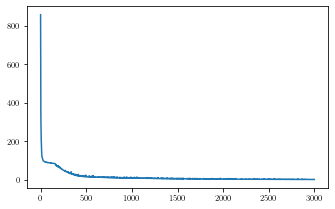

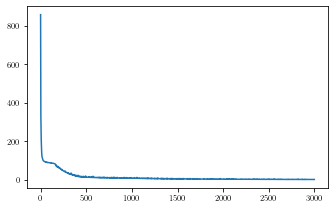

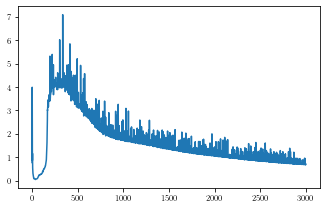

In [ ]:
    # Load Data
    # ——————————————————————————————————————————————————————————————————
    data = scipy.io.loadmat('../Data/cylinder_nektar_wake.mat')
           
    U_star = data['U_star'] # N x 2 x T
    P_star = data['p_star'] # N x T
    t_star = data['t'] # T x 1
    X_star = data['X_star'] # N x 2
    
    N = X_star.shape[0]
    T = t_star.shape[0]
    
    # Rearrange Data 
    XX = np.tile(X_star[:,0:1], (1,T)) # N x T
    YY = np.tile(X_star[:,1:2], (1,T)) # N x T
    TT = np.tile(t_star, (1,N)).T # N x T
    
    UU = U_star[:,0,:] # N x T
    VV = U_star[:,1,:] # N x T
    PP = P_star # N x T
    
    x = XX.flatten()[:,None] # NT x 1
    y = YY.flatten()[:,None] # NT x 1
    t = TT.flatten()[:,None] # NT x 1
    
    u = UU.flatten()[:,None] # NT x 1
    v = VV.flatten()[:,None] # NT x 1
    p = PP.flatten()[:,None] # NT x 1
    
    ######################################################################
    ######################## Noiseless Data ###############################
    ##x####################################################################
    # Training Data /randomly taken within the range of all timestamp  
    idx = np.random.choice(N*T, N_train, replace=False)
    x_train = x[idx,:]
    y_train = y[idx,:]
    t_train = t[idx,:]
    u_train = u[idx,:]
    v_train = v[idx,:]


    # Apply the Training
    model = PhysicsInformedNN(x_train, y_train, t_train, u_train, v_train, layers)
    #The train iterations
    epoch=30000
    model.train(epoch)

### Testing Stage for noiseless data
Choose a certain time stamp's data for testing,

In [ ]:
    t=np.arange(0,68*1.467451833203625E-004,1.467451833203625E-004);
    TT = np.tile(t, (N,1))
    # Test Data /specificly taken at a certain time stamp, in this case 10
    snap = np.array([1])
    x_star = XX[:,snap]
    y_star = YY[:,snap]
    t_star = TT[:,snap]
    
    u_star = UU[:,snap]
    v_star = VV[:,snap]
    p_star = PP[:,snap]
    
    # Prediction
    u_pred, v_pred, p_pred = model.predict(x_star, y_star, t_star)
    lambda_1_value = model.sess.run(model.lambda_1)
    lambda_2_value = model.sess.run(model.lambda_2)
    
    # Error
    error_u = np.linalg.norm(u_star-u_pred,2)/np.linalg.norm(u_star,2)
    error_v = np.linalg.norm(v_star-v_pred,2)/np.linalg.norm(v_star,2)
    error_p = np.linalg.norm(p_star-p_pred,2)/np.linalg.norm(p_star,2)

    error_lambda_1 = np.abs(lambda_1_value - 1.0)*100
    error_lambda_2 = np.abs(lambda_2_value - 0.01)/0.01 * 100
    print('Error u: %e' % (error_u))    
    print('Error v: %e' % (error_v))    
    print('Error p: %e' % (error_p))    
    print('Error l1: %.5f%%' % (error_lambda_1))                             
    print('Error l2: %.5f%%' % (error_lambda_2))  

Error u: 8.839996e-02
Error v: 2.959422e-01
Error p: 4.677732e+00
Error l1: 1.46522%
Error l2: 47.14050%


### Implement the plotting function 

In [ ]:
def plot_solution(X_star, u_star, index):
    
    lb = X_star.min(0)
    ub = X_star.max(0)
    nn = 200
    x = np.linspace(lb[0], ub[0], nn)
    y = np.linspace(lb[1], ub[1], nn)
    X, Y = np.meshgrid(x,y)
    
    U_star = griddata(X_star, u_star.flatten(), (X, Y), method='cubic')
    
    plt.figure(index)
    plt.pcolor(X,Y,U_star, cmap = 'jet')
    plt.colorbar()
    
    
def axisEqual3D(ax):
    extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
    sz = extents[:,1] - extents[:,0]
    centers = np.mean(extents, axis=1)
    maxsize = max(abs(sz))
    r = maxsize/4
    for ctr, dim in zip(centers, 'xyz'):
        getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)

### Prediction plot of original test data

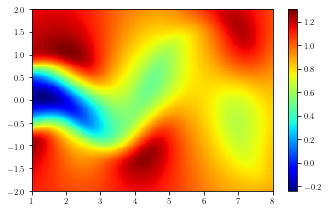

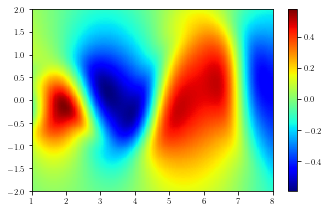

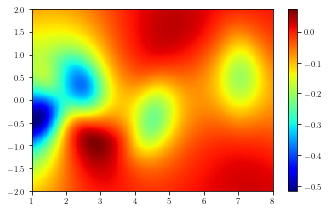

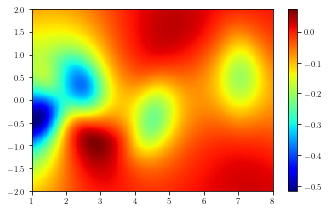

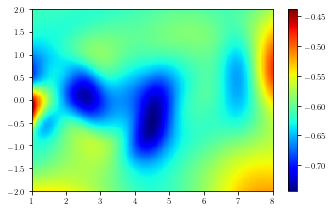

In [ ]:
    plot_solution(X_star, u_star, 1)
    plot_solution(X_star, v_star, 2)
    plot_solution(X_star, p_star, 3)
    plot_solution(X_star, p_star, 4)
    plot_solution(X_star, p_star - p_pred, 5)

### Prediction plot of noiseless data

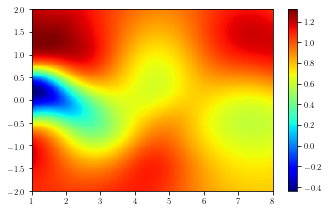

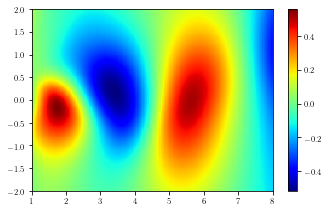

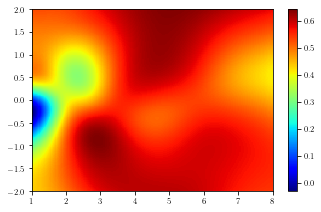

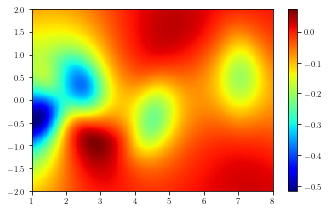

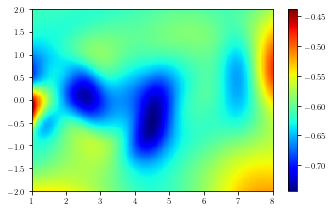

In [ ]:
    plot_solution(X_star, u_pred, 1)
    plot_solution(X_star, v_pred, 2)
    plot_solution(X_star, p_pred, 3)
    plot_solution(X_star, p_star, 4)
    plot_solution(X_star, p_star - p_pred, 5)

In [ ]:
    print(np.linalg.norm(p_star-p_pred,2)/np.linalg.norm(p_star,2))

### Training stage for noisy data

In [ ]:
    noise = 0.01        
    u_train = u_train + noise*np.std(u_train)*np.random.randn(u_train.shape[0], u_train.shape[1])
    v_train = v_train + noise*np.std(v_train)*np.random.randn(v_train.shape[0], v_train.shape[1])    
    # Training
    model = PhysicsInformedNN(x_train, y_train, t_train, u_train, v_train, layers)
    model.train(10000)

### Testing stage for noisy data  

In [ ]:
    lambda_1_value_noisy = model.sess.run(model.lambda_1)
    lambda_2_value_noisy = model.sess.run(model.lambda_2)
    u_pred_noisy, v_pred_noisy, p_pred_noisy = model.predict(x_star, y_star, t_star)
    
    
    error_lambda_1_noisy = np.abs(lambda_1_value_noisy - 1.0)*100
    error_lambda_2_noisy = np.abs(lambda_2_value_noisy - 0.01)/0.01 * 100
    error_u_noisy = np.linalg.norm(u_star-u_pred,2)/np.linalg.norm(u_star,2)
    error_v_noisy = np.linalg.norm(v_star-v_pred,2)/np.linalg.norm(v_star,2)
    error_p_noisy = np.linalg.norm(p_star-p_pred,2)/np.linalg.norm(p_star,2)

    error_lambda_1 = np.abs(lambda_1_value - 1.0)*100
    error_lambda_2 = np.abs(lambda_2_value - 0.01)/0.01 * 100
    print('Error u_noisy: %e' % (error_u_noisy))    
    print('Error v_noisy: %e' % (error_v_noisy))    
    print('Error p_noisy: %e' % (error_p_noisy))       
    print('Error l1_noisy: %.5f%%' % (error_lambda_1_noisy))                             
    print('Error l2_noisy: %.5f%%' % (error_lambda_2_noisy))     


### Prediction plot of noiseless prediction 

In [ ]:
    plot_solution(X_star, u_pred_noisy, 1)
    plot_solution(X_star, v_pred_noisy, 2)
    plot_solution(X_star, p_pred_noisy, 3)
    plot_solution(X_star, p_star, 4)
    plot_solution(X_star, p_star - p_pred_noisy, 5)